# Tugas Pemrograman 1 Information Retrieval



Author: Muhammad Ilham Ghozali dan Jaycent Gunawan Ongris

Nama: Fahmi Ramadhan

NPM: 2206026473


---



Pada tugas ini, Anda akan belajar menggunakan tools populer yang digunakan untuk text preprocessing pada Bahasa Indonesia dan Inggris. Selain itu, Anda juga akan mengimplementasikan data-driven tokenizers yang populer seperti Byte Pair Encoding dan WordPiece, serta menerapkannya untuk melakukan tokenization bahasa lain yang tidak menggunakan spasi.

## Requirements

In [1]:
%pip install --q datasets PySastrawi jieba

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Conventional Text Processing

Secara umum, terdapat beberapa tahapan yang dilakukan untuk text preprocessing, yakni tokenization, stemming (atau lemmatization), dan stopwords removal.

Pada kode demo berikut, Anda akan belajar cara melakukan text preprocessing dalam bahasa Inggris. Akan tetapi, pada tugas yang harus Anda kerjakan, Anda akan melakukan text preprocessing dokumen dalam bahasa Indonesia. Corpus yang akan digunakan adalah MSMARCO.

In [2]:
from datasets import load_dataset

dataset_eng = load_dataset("BeIR/msmarco", "corpus", split="corpus[:5%]")
dataset_eng

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['_id', 'title', 'text'],
    num_rows: 442091
})

In [3]:
dataset_eng[0]

{'_id': '0',
 'title': '',
 'text': 'The presence of communication amid scientific minds was equally important to the success of the Manhattan Project as scientific intellect was. The only cloud hanging over the impressive achievement of the atomic researchers and engineers is what their success truly meant; hundreds of thousands of innocent lives obliterated.'}

### (Basic) Tokenization

Tokenisasi adalah proses mengubah teks menjadi serangkaian token. Ada berbagai perspektif terkait apa yang dimaksud dengan token. Salah satu makna yang umum digunakan adalah setiap token merepresentasikan suatu kata tertentu. Namun, bisa juga token merepresentasikan informasi yang lebih granular seperti karakter. Salah satu metode sederhana yang dapat digunakan adalah dengan regular expression. Terdapat metode tokenisasi lain yang bersifat data-driven, di mana ini akan diperkenalkan berikutnya.

In [4]:
from nltk.tokenize import RegexpTokenizer

TOK_PATTERN = r'\w+'

# instansiasi di luar agar sekali saja
tokenizer = RegexpTokenizer(TOK_PATTERN)

# sekalian melakukan lowercasing
def tokenize_regex(text, tokenizer, lower=True):
    result = tokenizer.tokenize(text)
    if lower:
        result = [x.lower() for x in result]
    return result

result_tok = tokenize_regex(dataset_eng[0]['text'], tokenizer)
print(result_tok)

['the', 'presence', 'of', 'communication', 'amid', 'scientific', 'minds', 'was', 'equally', 'important', 'to', 'the', 'success', 'of', 'the', 'manhattan', 'project', 'as', 'scientific', 'intellect', 'was', 'the', 'only', 'cloud', 'hanging', 'over', 'the', 'impressive', 'achievement', 'of', 'the', 'atomic', 'researchers', 'and', 'engineers', 'is', 'what', 'their', 'success', 'truly', 'meant', 'hundreds', 'of', 'thousands', 'of', 'innocent', 'lives', 'obliterated']


### Stemming and Lemmatization

Stemming bekerja dengan memotong beberapa bagian dari suatu kata seperti afiks berdasarkan aturan tertentu, tanpa perlu memastikan bahwa kata hasil pemotongan terdapat di kamus atau tidak. Sementara itu, lemmatization serupa dengan stemming, hanya saja semua hasilnya dipastikan ada di kamus (ada dictionary lookup).

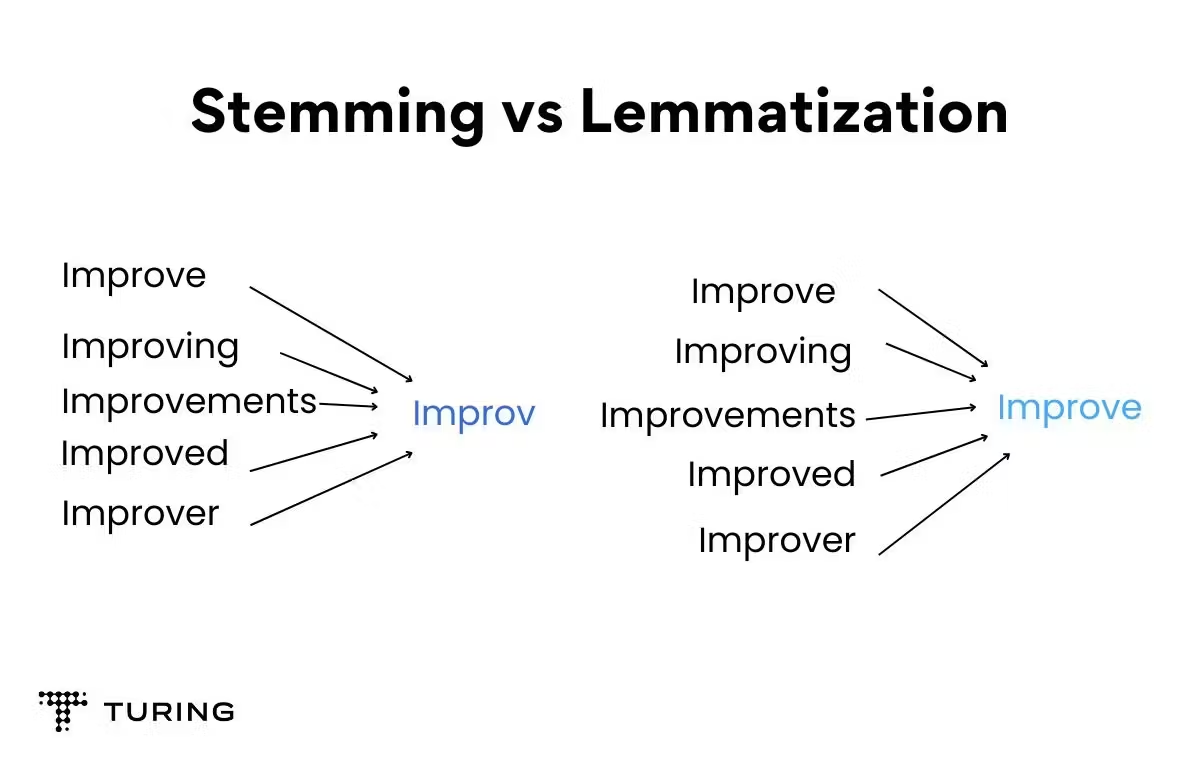

Source: https://www.turing.com/kb/stemming-vs-lemmatization-in-python

In [5]:
from nltk.stem import WordNetLemmatizer
from typing import List
import nltk

# terdapat beberapa jenis lemmatizer; kita akan gunakan wordnet saja,
# tetapi sebelumnya perlu download resource wordnet dulu
nltk.download('wordnet')
en_lemmatizer = WordNetLemmatizer()

def lemmatize(tokens: List[str], lemmatizer):
    return [lemmatizer.lemmatize(token) for token in tokens]

result_wn = lemmatize(result_tok, en_lemmatizer)
print(result_wn)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['the', 'presence', 'of', 'communication', 'amid', 'scientific', 'mind', 'wa', 'equally', 'important', 'to', 'the', 'success', 'of', 'the', 'manhattan', 'project', 'a', 'scientific', 'intellect', 'wa', 'the', 'only', 'cloud', 'hanging', 'over', 'the', 'impressive', 'achievement', 'of', 'the', 'atomic', 'researcher', 'and', 'engineer', 'is', 'what', 'their', 'success', 'truly', 'meant', 'hundred', 'of', 'thousand', 'of', 'innocent', 'life', 'obliterated']


In [6]:
from nltk.stem import PorterStemmer

# terdapat beberapa jenis stemmer juga; kita akan gunakan Porter stemmer saja
en_stemmer = PorterStemmer()

def stem(tokens: List[str], stemmer):
    return [stemmer.stem(token) for token in tokens]

result_ps = stem(result_tok, en_stemmer)
print(result_ps)

['the', 'presenc', 'of', 'commun', 'amid', 'scientif', 'mind', 'wa', 'equal', 'import', 'to', 'the', 'success', 'of', 'the', 'manhattan', 'project', 'as', 'scientif', 'intellect', 'wa', 'the', 'onli', 'cloud', 'hang', 'over', 'the', 'impress', 'achiev', 'of', 'the', 'atom', 'research', 'and', 'engin', 'is', 'what', 'their', 'success', 'truli', 'meant', 'hundr', 'of', 'thousand', 'of', 'innoc', 'live', 'obliter']


Sekarang, bandingkan hasil sebelum dan sesudah stemming dan lemmatization.

In [7]:
print(f"Original: \t{result_tok}")
print(f"Lemmatization: \t{result_wn}")
print(f"Stemming: \t{result_ps}")

Original: 	['the', 'presence', 'of', 'communication', 'amid', 'scientific', 'minds', 'was', 'equally', 'important', 'to', 'the', 'success', 'of', 'the', 'manhattan', 'project', 'as', 'scientific', 'intellect', 'was', 'the', 'only', 'cloud', 'hanging', 'over', 'the', 'impressive', 'achievement', 'of', 'the', 'atomic', 'researchers', 'and', 'engineers', 'is', 'what', 'their', 'success', 'truly', 'meant', 'hundreds', 'of', 'thousands', 'of', 'innocent', 'lives', 'obliterated']
Lemmatization: 	['the', 'presence', 'of', 'communication', 'amid', 'scientific', 'mind', 'wa', 'equally', 'important', 'to', 'the', 'success', 'of', 'the', 'manhattan', 'project', 'a', 'scientific', 'intellect', 'wa', 'the', 'only', 'cloud', 'hanging', 'over', 'the', 'impressive', 'achievement', 'of', 'the', 'atomic', 'researcher', 'and', 'engineer', 'is', 'what', 'their', 'success', 'truly', 'meant', 'hundred', 'of', 'thousand', 'of', 'innocent', 'life', 'obliterated']
Stemming: 	['the', 'presenc', 'of', 'commun', 

### Stopwords Removal

Stopwords merupakan kata-kata yang umumnya memiliki frekuensi yang sangat tinggi dalam teks namun tidak memberikan informasi yang signifikan. Oleh karena itu, kata-kata tersebut seringkali dihapus
agar menyisakan informasi yang "penting" saja.

In [8]:
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def remove_stopwords(tokens: List[str], stopwords):
    return [token for token in tokens if token not in stopwords]

en_stopwords = set(stopwords.words('english'))
result_no_stopwords = remove_stopwords(result_tok, en_stopwords)
print(result_no_stopwords)

['presence', 'communication', 'amid', 'scientific', 'minds', 'equally', 'important', 'success', 'manhattan', 'project', 'scientific', 'intellect', 'cloud', 'hanging', 'impressive', 'achievement', 'atomic', 'researchers', 'engineers', 'success', 'truly', 'meant', 'hundreds', 'thousands', 'innocent', 'lives', 'obliterated']


### Pipeline

Kita dapat menerapkan ini semua ke dalam sebuah pipeline.

In [10]:
def pre_processing_en(text: str, tokenizer, lemmatizer, stemmer, stopwords):
    result_tok = tokenize_regex(text, tokenizer)
    result_wn = lemmatize(result_tok, lemmatizer)
    result_ps = stem(result_wn, stemmer)
    result_no_stopwords = remove_stopwords(result_ps, stopwords)
    return result_no_stopwords

print(pre_processing_en(dataset_eng[0]['text'], tokenizer, en_lemmatizer, en_stemmer, en_stopwords))

['presenc', 'commun', 'amid', 'scientif', 'mind', 'wa', 'equal', 'import', 'success', 'manhattan', 'project', 'scientif', 'intellect', 'wa', 'onli', 'cloud', 'hang', 'impress', 'achiev', 'atom', 'research', 'engin', 'success', 'truli', 'meant', 'hundr', 'thousand', 'innoc', 'life', 'obliter']


Silakan Anda lihat kembali pipeline di atas. Lalu, jawablah pertanyaan-pertanyaan berikut ini dan implementasikan pipeline baru dengan versi yang lebih baik menurut Anda.



*   Pada pipeline tersebut, lemmatization dan stemming diimplementasikan keduanya. Menurut Anda, apakah ini adalah sebuah practice yang baik? Jelaskan argumen Anda.
*   Berdasarkan pertanyaan sebelumnya, jika menurut Anda hanya salah satu yang dapat digunakan dalam satu pipeline tertentu, jelaskan alasan Anda mengatakan demikian. Tentukan pula apa yang akan Anda gunakan, apakah stemming atau lemmatization, serta jelaskan mengapa Anda memilih teknik tersebut. Sementara itu, jika menurut Anda keduanya saling melengkapi dan harus digunakan semuanya, jelaskan argumen Anda. Jelaskan, mana yang lebih baik, apakah stemming atau lemmatization yang duluan dilakukan?
*   Perhatikan contoh hasil eksekusi pipeline di atas, untuk stopwords yang diberikan, apakah proses stopwords removal sebaiknya dilakukan terakhir setelah stemming atau lemmatization?
*   Dalam bahasa Inggris, dikenal istilah [contractions](https://www.sjsu.edu/writingcenter/docs/handouts/Contractions.pdf), yakni bentuk pendek dari beberapa kata, seperti `you will --> you'll`, `i am --> i'm`, dan sebagainya. Untuk kasus pipeline di atas dengan menggunakan semua tools yang diperkenalkan sebelumnya (hint: lihat stopwords yang digunakan), apakah menurut Anda contractions perlu ditangani? Jika ya, jelaskan jawaban Anda dan sebutkan langkah apa yang akan Anda lakukan untuk menangani contractions tersebut. Jika tidak, cukup jelaskan argumen Anda.



> - Menurut saya, penggunaan lemmatization dan stemming sekaligus bukanlah practice yang baik karena keduanya memiliki tujuan yang serupa, yaitu untuk reduksi kata ke bentuk dasar, tetapi menggunakan pendekatan yang berbeda sehingga penggunaan keduanya akan menjadi rendundan. Jika kita melakukan lemmatization kemudian stemming ataupun sebaliknya, hasilnya tidak akan jauh berbeda dengan hanya menggunakan stemming. Misalnya, kata "communication" setelah dilakukan lemmatization akan tetap "communication" tetapi setelah dilakukan stemming akan menjadi "commun". Sementara itu, jika kata "commun" dilakukan lemmatization juga akan tetap "commun". 
> - Berdasarkan jawaban sebelumnya, menurut saya lebih baik hanya satu yang digunakan dalam satu pipeline agar tidak redundan. Pada kasus ini, saya akan menggunakan lemmatization agar menghasilkan bentuk dasar yang valid (sesuai kamus) sehingga akurasinya lebih baik dan makna kata tetap terjaga. Meskipun kecepatannya lebih lambat daripada stemming, pada kasus ini tidak terlalu perlu diperhatikan karena datasetnya yang kecil.
> - Menurut saya, sebaiknya proses stopwords removal dilakukan terlebih dahulu sebelum lemmatization ataupun stemming. Jika kita melakukan lemmatization atau stemming terlebih dahulu, stopwords yang seharusnya dihapus bisa saja tidak terhapus karena katanya sudah termodifikasi. Misalnya, kata "was" yang merupakan stopword jika dilakukan lemmatization akan menjadi "wa" sehingga tidak lagi dianggap sebagai stopwords.
> - Menurut saya, contractions memang perlu ditangani dalam pipeline pemrosesan teks bahasa inggris. Misalnya, jika "you will" dianggap sebagai stopwords karena kata "you" dan "will" terdapat dalam daftar stopwords, maka seharusnya bentuk contractions-nya juga dianggap sebagai stopwords agar konsisten. Pada kasus ini, untuk menangani contractions dari "you will", kita perlu menambahkan "you" dan "ll" ke daftar stopwords. Untuk kata "you'll", pada kasus ini sebenarnya tidak perlu ditambahkan ke daftar stopwords karena tokenization pattern yang kita gunakan adalah `r'\w+'` sehingga kata yang mengandung `'` pasti akan dipecah menjadi lebih dari satu token.

Selanjutnya, perbaiki pipeline tersebut sesuai insight yang Anda dapatkan dari pertanyaan-pertanyaan sebelumnya. Silakan modifikasi parameter function jika memang diperlukan.

In [11]:
def pre_processing_en(text: str, tokenizer, lemmatizer, stopwords):
    result_tok = tokenize_regex(text, tokenizer)
    result_no_stopwords = remove_stopwords(result_tok, stopwords)
    result_wn = lemmatize(result_no_stopwords, lemmatizer)
    return result_wn

print(pre_processing_en(dataset_eng[0]['text'], tokenizer, en_lemmatizer, en_stopwords))

['presence', 'communication', 'amid', 'scientific', 'mind', 'equally', 'important', 'success', 'manhattan', 'project', 'scientific', 'intellect', 'cloud', 'hanging', 'impressive', 'achievement', 'atomic', 'researcher', 'engineer', 'success', 'truly', 'meant', 'hundred', 'thousand', 'innocent', 'life', 'obliterated']


Dataset yang kita gunakan merupakan instance dari object Dataset oleh HuggingFace. Kita dapat mentransformasikan dataset tersebut dengan pipeline yang sudah kita definisikan sebelumnya menggunakan method `map()`.

In [12]:
dataset_eng_preprocessed = dataset_eng.map(
    lambda row: {'tokens': pre_processing_en(
        row['text'],
        tokenizer,
        en_lemmatizer,
        en_stopwords)
    },
    remove_columns = ['_id', 'title', 'text'],
)
dataset_eng_preprocessed

Dataset({
    features: ['tokens'],
    num_rows: 442091
})

### Build Your Own Stopwords Set

Anda akan membangun sendiri himpunan kata stopwords berdasarkan corpus yang diberikan. Definisi stopwords dalam kasus ini adalah top-200 token yang memiliki frekuensi kemunculan terbanyak. Gunakan hasil preprocessing yang telah dilakukan di `dataset_eng_preprocessed`. Output dari section ini adalah sebuah set yang berisi top-200 token dengan frekuensi kemunculan tertinggi.

In [13]:
from collections import defaultdict

# keep track pasangan token dan frekuensinya di sini
token_freq = defaultdict(int)

# lengkapi fungsi ini untuk menghitung frekuensi tiap token
def count_token(tokens_list: List[str]):
    for token in tokens_list:
        token_freq[token] += 1

dataset_eng_preprocessed.map(
    lambda row: (count_token(row['tokens'])),
)

Map: 100%|██████████| 442091/442091 [00:31<00:00, 13949.10 examples/s]


Dataset({
    features: ['tokens'],
    num_rows: 442091
})

In [14]:
import heapq

# sort dan berikan set of top-200 token stopwords
top_200_tokens = heapq.nlargest(200, token_freq.keys(), key=token_freq.get)
custom_stopwords = set(top_200_tokens)
print(f"Jumlah custom stopwords: {len(custom_stopwords)}")
print(list(custom_stopwords))

Jumlah custom stopwords: 200
['year', 'people', 'business', '0', 'c', 'county', 'full', 'found', 'skin', '1', 'life', 'job', 'u', 'mean', 'case', 'start', 'child', '5', 'mile', 'different', 'free', 'end', 'infection', '100', 'thing', 'called', 'top', 'day', 'term', 'person', 'good', '10', 'order', 'com', 'name', 'muscle', 'world', 'work', 'service', 'show', 'one', 'even', 'place', 'care', 'condition', 'often', 'example', 'change', 'salary', 'high', 'property', 'less', 'symptom', 'school', 'click', 'medical', 'take', 'usually', 'account', '3', 'know', 'average', 'country', 'three', 'made', 'known', 'foot', '4', 'information', 'make', 'first', 'water', 'around', 'data', 'answer', '20', 'size', 'set', 'another', 'common', 'city', 'home', '6', 'effect', 'plant', 'area', 'code', 'would', 'state', 'â', 'level', 'health', 'based', 'list', 'many', '30', 'heart', 'help', 'test', 'tax', 'following', 'small', 'get', 'minute', 'american', 'much', 'time', 'using', '000', 'price', 'rate', 'available

Berdasarkan implementasi pembuatan himpunan stopwords sebelumnya, jawablah pertanyaan berikut ini.


*   Apa perbedaan himpunan stopwords yang dibuat sendiri dan stopwords standar buatan NLTK?
*   Lihat kembali pipeline hasil perbaikan Anda sebelumnya (`pre_processing_en`). Misalkan Anda diberikan sebuah corpus lain, di mana penghapusan stopwords dilakukan berdasarkan gabungan dari himpunan stopwords NLTK dan himpunan stopwords yang barusan Anda bangun, apakah perlu ada perubahan dari pipeline yang didefinisikan pada `pre_processing_en`? Jika iya, jelaskan alasan Anda dan berikan urutan pipeline yang baru. Jika tidak, cukup jelaskan alasan Anda.



> - Stopwords NLTK ditentukan secara linguistik yang bersi yang fokus pada kata-kata generic atau kata-kata fungsi/gramatikal seperti preposisi (of, in, on, at, by, with), konjungsi (and, but, or, if, because, than), dan artikel (a, an, the). Sementara itu, stopwords yang dibuat sendiri tadi ditentukan secara statistik berdasarkan frekuensi dalam corpus tertentu, jadi isinya banyak kata-kata yang umum dalam corpus tersebut.
> - Jika menggunakan gabungan stopwords dari NLTK dan buatan sendiri, pipeline-nya tidak perlu diubah karena yang perlu diubah hanyalah argumen untuk parameter stopwords saat kita memanggil fungsi pipeline-nya.

### Indonesian Text Preprocessing Pipeline

Pada section ini, perlu didefinisikan pipeline baru untuk melakukan text preprocessing pada teks bahasa Indonesia. Kita akan menggunakan dataset `jakartaresearch/indonews`.

In [15]:
dataset_idn = load_dataset("jakartaresearch/indonews", split="train")
dataset_idn = dataset_idn.remove_columns("label")
dataset_idn

Dataset({
    features: ['text'],
    num_rows: 6127
})

In [16]:
print(dataset_idn[0]['text'])

Liputan6.com, London - Lee Dixon khawatir Arsenal tak bisa merekrut Denis Suarez secara permanen musim panas nanti. Pasalnya sejauh ini, Suarez hanya menjadi cadangan bagi The Gunners.

Suarez dipinjam Arsenal dari Barcelona, Januari lalu. The Gunners juga bisa membelinya pada akhir musim nanti jika permainannya memuaskan.

Namun sejauh ini Suarez tak menjadi pilihan utama di Arsenal. Manajer Unai Emery baru memberinya kesempatan bermain selama 85 menit.

"Emery mungkin tahu kualitas Suarez. Dia tahu Suarez pemain yang dibutuhkannya," kata Dixon seperti dilansir Evening Standard.

"Namun dari sudut pandang Suarez, dia pasti berpikir untuk apa pindah kalau tidak bermain. Jadi mungkin saja dia akan menolak Arsenal," katanya menambahkan.


Silakan gunakan library seperti PySastrawi atau lainnya (silakan diinstal jika memang diperlukan) untuk melakukan preprocessing ini. Pipeline yang diinginkan hanyalah tokenization --> stemming --> stopwords removal. Anda diperbolehkan menggunakan kembali pipeline sebelumnya. Tunjukkan salah satu sampel perbandingan tokens hasil tokenisasi saja dan tokens setelah dilakukan stemming dan stopwords removal (tokens hasil preprocessing).

In [17]:
# TODO
# lakukan regex tokenization pada dataset_idn[0]['text']
result_tok = tokenize_regex(dataset_idn[0]['text'], tokenizer)
print(result_tok)

['liputan6', 'com', 'london', 'lee', 'dixon', 'khawatir', 'arsenal', 'tak', 'bisa', 'merekrut', 'denis', 'suarez', 'secara', 'permanen', 'musim', 'panas', 'nanti', 'pasalnya', 'sejauh', 'ini', 'suarez', 'hanya', 'menjadi', 'cadangan', 'bagi', 'the', 'gunners', 'suarez', 'dipinjam', 'arsenal', 'dari', 'barcelona', 'januari', 'lalu', 'the', 'gunners', 'juga', 'bisa', 'membelinya', 'pada', 'akhir', 'musim', 'nanti', 'jika', 'permainannya', 'memuaskan', 'namun', 'sejauh', 'ini', 'suarez', 'tak', 'menjadi', 'pilihan', 'utama', 'di', 'arsenal', 'manajer', 'unai', 'emery', 'baru', 'memberinya', 'kesempatan', 'bermain', 'selama', '85', 'menit', 'emery', 'mungkin', 'tahu', 'kualitas', 'suarez', 'dia', 'tahu', 'suarez', 'pemain', 'yang', 'dibutuhkannya', 'kata', 'dixon', 'seperti', 'dilansir', 'evening', 'standard', 'namun', 'dari', 'sudut', 'pandang', 'suarez', 'dia', 'pasti', 'berpikir', 'untuk', 'apa', 'pindah', 'kalau', 'tidak', 'bermain', 'jadi', 'mungkin', 'saja', 'dia', 'akan', 'menolak',

In [18]:
# TODO
# lakukan stemming pada dataset_idn[0]['text']
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer_factory = StemmerFactory()
id_stemmer = stemmer_factory.create_stemmer()

result_stem = stem(result_tok, id_stemmer)
print(result_stem)

['liputan6', 'com', 'london', 'lee', 'dixon', 'khawatir', 'arsenal', 'tak', 'bisa', 'rekrut', 'den', 'suarez', 'cara', 'permanen', 'musim', 'panas', 'nanti', 'pasal', 'jauh', 'ini', 'suarez', 'hanya', 'jadi', 'cadang', 'bagi', 'the', 'gunners', 'suarez', 'pinjam', 'arsenal', 'dari', 'barcelona', 'januari', 'lalu', 'the', 'gunners', 'juga', 'bisa', 'bel', 'pada', 'akhir', 'musim', 'nanti', 'jika', 'main', 'muas', 'namun', 'jauh', 'ini', 'suarez', 'tak', 'jadi', 'pilih', 'utama', 'di', 'arsenal', 'manajer', 'unai', 'emery', 'baru', 'beri', 'sempat', 'main', 'lama', '85', 'menit', 'emery', 'mungkin', 'tahu', 'kualitas', 'suarez', 'dia', 'tahu', 'suarez', 'main', 'yang', 'butuh', 'kata', 'dixon', 'seperti', 'lansir', 'evening', 'standard', 'namun', 'dari', 'sudut', 'pandang', 'suarez', 'dia', 'pasti', 'pikir', 'untuk', 'apa', 'pindah', 'kalau', 'tidak', 'main', 'jadi', 'mungkin', 'saja', 'dia', 'akan', 'tolak', 'arsenal', 'kata', 'tambah']


In [19]:
# TODO
# lakukan stopwords removal pada dataset_idn[0]['text']
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stopword_factory = StopWordRemoverFactory()
id_stopwords = set(stopword_factory.get_stop_words())

result_no_stopwords = remove_stopwords(result_tok, id_stopwords)
print(result_no_stopwords)

['liputan6', 'com', 'london', 'lee', 'dixon', 'khawatir', 'arsenal', 'merekrut', 'denis', 'suarez', 'permanen', 'musim', 'panas', 'pasalnya', 'suarez', 'cadangan', 'the', 'gunners', 'suarez', 'dipinjam', 'arsenal', 'barcelona', 'januari', 'the', 'gunners', 'membelinya', 'musim', 'permainannya', 'memuaskan', 'suarez', 'pilihan', 'utama', 'arsenal', 'manajer', 'unai', 'emery', 'memberinya', 'kesempatan', 'bermain', '85', 'menit', 'emery', 'kualitas', 'suarez', 'suarez', 'pemain', 'dibutuhkannya', 'dixon', 'dilansir', 'evening', 'standard', 'sudut', 'pandang', 'suarez', 'berpikir', 'pindah', 'bermain', 'menolak', 'arsenal']


In [20]:
# TODO
# definisikan pipeline yang mentransformasikan dataset_idn menjadi
# hanya terdiri dari kolom `tokens` saja, yang berisi list of tokens
# hasil preprocessing, lalu simpan ke variable dataset_idn_preprocessed

def pre_processing_idn(text: str, tokenizer, stemmer, stopwords):
    result_tok = tokenize_regex(text, tokenizer)
    result_stem = stem(result_tok, stemmer)
    result_no_stopwords = remove_stopwords(result_stem, stopwords)
    return result_no_stopwords

dataset_idn_preprocessed = dataset_idn.map(
    lambda row: {'tokens': pre_processing_idn(
        row['text'],
        tokenizer,
        id_stemmer,
        id_stopwords)
    },
    remove_columns = ['text'],
)
dataset_idn_preprocessed

Dataset({
    features: ['tokens'],
    num_rows: 6127
})

In [21]:
# TODO
# bandingkan hasil regex tokenization, stemming, stopwords removal
print(f"Original: \t{result_tok}")
print(f"Stemming: \t{result_stem}")
print(f"No stopwords: \t{result_no_stopwords}")

Original: 	['liputan6', 'com', 'london', 'lee', 'dixon', 'khawatir', 'arsenal', 'tak', 'bisa', 'merekrut', 'denis', 'suarez', 'secara', 'permanen', 'musim', 'panas', 'nanti', 'pasalnya', 'sejauh', 'ini', 'suarez', 'hanya', 'menjadi', 'cadangan', 'bagi', 'the', 'gunners', 'suarez', 'dipinjam', 'arsenal', 'dari', 'barcelona', 'januari', 'lalu', 'the', 'gunners', 'juga', 'bisa', 'membelinya', 'pada', 'akhir', 'musim', 'nanti', 'jika', 'permainannya', 'memuaskan', 'namun', 'sejauh', 'ini', 'suarez', 'tak', 'menjadi', 'pilihan', 'utama', 'di', 'arsenal', 'manajer', 'unai', 'emery', 'baru', 'memberinya', 'kesempatan', 'bermain', 'selama', '85', 'menit', 'emery', 'mungkin', 'tahu', 'kualitas', 'suarez', 'dia', 'tahu', 'suarez', 'pemain', 'yang', 'dibutuhkannya', 'kata', 'dixon', 'seperti', 'dilansir', 'evening', 'standard', 'namun', 'dari', 'sudut', 'pandang', 'suarez', 'dia', 'pasti', 'berpikir', 'untuk', 'apa', 'pindah', 'kalau', 'tidak', 'bermain', 'jadi', 'mungkin', 'saja', 'dia', 'akan',

### Stemming and Lemmatization Across Languages

Disini, kita akan menjelajahi berbagai alat pemrosesan teks untuk berbagai bahasa:
- Bahasa Inggris: Menggunakan NLTK
- Bahasa Indonesia: Menggunakan Sastrawi
- Bahasa Mandarin: Menggunakan Jieba

Kita akan membandingkan hasil stemming dan lematisasi di antara bahasa-bahasa ini.

In [22]:
# English

en_text = "The cats are running and jumping through the gardens. They were playing earlier."

en_tokens = tokenize_regex(en_text, tokenizer)
en_lemmatized = lemmatize(en_tokens, en_lemmatizer)
en_stemmed = stem(en_tokens, en_stemmer)

print("English Processing:")
print(f"Original: \t{en_tokens}")
print(f"Lemmatized: \t{en_lemmatized}")
print(f"Stemmed: \t{en_stemmed}\n")

English Processing:
Original: 	['the', 'cats', 'are', 'running', 'and', 'jumping', 'through', 'the', 'gardens', 'they', 'were', 'playing', 'earlier']
Lemmatized: 	['the', 'cat', 'are', 'running', 'and', 'jumping', 'through', 'the', 'garden', 'they', 'were', 'playing', 'earlier']
Stemmed: 	['the', 'cat', 'are', 'run', 'and', 'jump', 'through', 'the', 'garden', 'they', 'were', 'play', 'earlier']



In [23]:
# Indonesian

id_text = "Kucing-kucing itu sedang berlari dan melompat di taman. Mereka bermain sejak tadi."

id_tokens = tokenize_regex(id_text, tokenizer)
id_stemmed = stem(id_tokens, id_stemmer)

print("Indonesian Processing:")
print(f"Original: \t{id_tokens}")
print(f"Stemmed: \t{id_stemmed}\n")


Indonesian Processing:
Original: 	['kucing', 'kucing', 'itu', 'sedang', 'berlari', 'dan', 'melompat', 'di', 'taman', 'mereka', 'bermain', 'sejak', 'tadi']
Stemmed: 	['kucing', 'kucing', 'itu', 'sedang', 'lari', 'dan', 'lompat', 'di', 'taman', 'mereka', 'main', 'sejak', 'tadi']



Dalam bahasa Mandarin, karena teks bahasa Mandarin tidak memiliki spasi eksplisit untuk memisahkan kata-kata seperti bahasa Inggris atau Indoesia dilakukan dengan membagi rangkaian karakter bahasa Mandarin yang terus menerus menjadi kata-kata yang bermakna. Tantangan utama berasal dari ambiguitas batas kata, di mana segmentasi yang berbeda dapat menyebabkan interpretasi yang berbeda. Pendekatan tradisional mencakup metode berbasis aturan seperti algoritma Maximum Matching algorithm, yang mengulang-ulang teks untuk menemukan kata-kata yang paling cocok dengan kamus, dan metode statistik yang memanfaatkan distribusi frekuensi dan model probabilitas untuk menentukan segmentasi yang paling mungkin.

Juga terdapat teknik yang lain menggabungkan analisis sintaksis dan semantik, serta model Machine Leanring. Untuk lebih lanjutnya, jika anda penasaran, anda bisa melihat paper [ini](https://www.isca-archive.org/interspeech_2004/badino04_interspeech.pdf)


Untungnya, kami punya Jieba, sebuah library Python untuk segmentasi kata dalam bahasa Mandarin yang menggunakan gabungan teknik Dictionary-Based Matching, statistik, dan Hidden Markov Model.

In [24]:
# Mandarin
import jieba

zh_text = "猫们正在花园里跑来跑去。它们刚才在玩耍。"

def tokenize_zh(text):
	# TODO gunakan jieba untuk mengtokenize zh_text
    return list(jieba.cut(text))

# Process Mandarin
zh_tokens = tokenize_zh(zh_text)

print("Mandarin Processing:")
print(f"Original text: \t{zh_text}")
print(f"Tokenized: \t{zh_tokens}\n")


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 0.814 seconds.
Prefix dict has been built successfully.


Mandarin Processing:
Original text: 	猫们正在花园里跑来跑去。它们刚才在玩耍。
Tokenized: 	['猫们', '正在', '花园里', '跑来跑去', '。', '它们', '刚才', '在', '玩耍', '。']



Berdasarkan dari hasil diatas jawablah beberapa pertanyaan dibawah ini.

1. Bandingkan hasil stemming vs lemmatization dalam bahasa Inggris. Apa perbedaan utama yang Anda amati?

2. Apakah stemming saja cukup digunakan untuk bahasa Indonesia? Apa yang membedakannya dengan bahasas Inggris?

3. Untuk bahasa Mandarin:
- Mengapa kita biasanya tidak menggunakan stemming atau lemmatization?
- Apa saja tantangan dalam memproses teks bahasa Mandarin?

> 1. Dari hasil di atas, perbedaan utama antara stemming dan lemmatization dalam bahasa Inggris di kasus ini adalah lemmatization hanya mengubah kata plural menjadi menjadi kata singular (contohnya "cats" jadi "cat"), sementara stemming lebih agresif dengan menghilangkan "-ing" untuk membentuk kata dasar (contohnya "running" jadi "run").

> 2. Menurut saya, stemming saja cukup untuk bahasa Indonesia karena bahasa Indonesia memiliki sistem morfologi yang lebih teratur dan konsisten dibanding bahasa Inggris karena imbuhan dalam bahasa Indonesia (awalan, sisipan, akhiran) mengikuti pola yang relatif teratur. Selain itu, bahasa Indonesia juga tidak memiliki perubahan bentuk kata yang tidak teratur (irregular forms) sebanyak bahasa Inggris dan juga tidak memerlukan penanganan khusus untuk plural karena dalam bahasa Indonesia bentuk plural ditandai dengan pengulangan kata (contohnya "Kucing-kucing").

> 3. Untuk bahasa Mandarin, kita biasanya tidak menggunakan stemming atau lemmatization karena bahasa Mandarin tidak menggunakan imbuhan untuk menandai perubahan gramatikal serta karakternya tidak mengalami perubahan bentuk untuk menunjukkan waktu, jumlah, atau aspek gramatikal lainnya. Namun, tantangan dalam memproses teks bahasa Mandarin di antaranya: 
> - tidak adanya pemisah kata (spasi) yang jelas sehingga untuk tokenisasinya menjadi lebih rumit
> - banyak karakter yang dapat membentuk kata berbeda tergantung konteksnya sehingga menimbulkan ambiguitas, jadi perbedaan cara segmentasi kalimat dapat membentuk makna yang berbeda. Misalnya 我喜欢新西兰花 bisa disegmentasi menjadi 我（I）喜欢（like）新西兰（New Zeland）花（flowers）ataupun 我（I）喜欢（like）新（fresh）西兰花（broccoli）dan keduanya merupakan kalimat yang masuk akal.

## Byte Pair Encoding (BPE) Tokenizer

Pada bagian ini, Anda akan belajar mengimplementasikan salah satu data-driven tokenizer yang terkenal, yakni BPE. BPE digunakan dalam pre-training model GPT yang dikembangkan oleh OpenAI. Kita akan gunakan dataset bahasa Indonesia sebelumnya sebagai corpus.



Corpus berisi kumpulan dokumen, sedangkan BPE membutuhkan semuanya menjadi satuan kata-kata. Oleh karena itu, perlu ada tahap pre-tokenization. Umumnya, tahap ini meliputi pemecahan sentence menjadi list of words dan lowercasing. Silakan gunakan method `tokenize_regex` sebelumnya.

In [25]:
corpus = dataset_idn["text"]
len(corpus)

6127

In [26]:
print(tokenize_regex(corpus[0], tokenizer))

['liputan6', 'com', 'london', 'lee', 'dixon', 'khawatir', 'arsenal', 'tak', 'bisa', 'merekrut', 'denis', 'suarez', 'secara', 'permanen', 'musim', 'panas', 'nanti', 'pasalnya', 'sejauh', 'ini', 'suarez', 'hanya', 'menjadi', 'cadangan', 'bagi', 'the', 'gunners', 'suarez', 'dipinjam', 'arsenal', 'dari', 'barcelona', 'januari', 'lalu', 'the', 'gunners', 'juga', 'bisa', 'membelinya', 'pada', 'akhir', 'musim', 'nanti', 'jika', 'permainannya', 'memuaskan', 'namun', 'sejauh', 'ini', 'suarez', 'tak', 'menjadi', 'pilihan', 'utama', 'di', 'arsenal', 'manajer', 'unai', 'emery', 'baru', 'memberinya', 'kesempatan', 'bermain', 'selama', '85', 'menit', 'emery', 'mungkin', 'tahu', 'kualitas', 'suarez', 'dia', 'tahu', 'suarez', 'pemain', 'yang', 'dibutuhkannya', 'kata', 'dixon', 'seperti', 'dilansir', 'evening', 'standard', 'namun', 'dari', 'sudut', 'pandang', 'suarez', 'dia', 'pasti', 'berpikir', 'untuk', 'apa', 'pindah', 'kalau', 'tidak', 'bermain', 'jadi', 'mungkin', 'saja', 'dia', 'akan', 'menolak',

In [27]:
from typing import List
from collections import defaultdict
from tqdm import tqdm

class BPETokenizer:
    def __init__(self, vocab_size: int):
        self.vocab_size = vocab_size        # berisi ukuran vocab yang diinginkan
        self.merges = {}                    # berisi rule untuk merge, seperti {("l", "o"): "lo"}
        self.vocab = set()                  # berisi daftar vocab
        self.splits = {}                    # berisi split untuk setiap kalimat, seperti {"halo": ["h", "a", "l", "o"]}
        self.word_freqs = defaultdict(int)  # berisi mapping kata dan frekuensi yang ada di corpus
        self.pair_freqs = defaultdict(int)  # berisi mapping pair of letters dan frekuensinya yang terbentuk

    def __populate_initial(self, corpus: List[str]):
        # isi self.word_freqs dan self.vocab
        for text in corpus:
            pretokenized = tokenize_regex(text, tokenizer)
            for word in pretokenized:
                self.word_freqs[word] += 1
                self.vocab.update(word)

        # isi self.splits
        for word in self.word_freqs.keys():
            self.splits[word] = [c for c in word]

    def __compute_pair_freqs(self):
        # isi/update self.pair_freqs
        # gunakan informasi dari self.splits untuk iterasi semua kemungkinan
        # pasangan dari tiap kata
        # tidak perlu return apa-apa
        # contoh: jika punya "halo" dengan split ["ha", "l", "o"] dengan frekuensi 3 maka
        #         lakukan iterasi di listnya sambil gabungkan tokennya, i.e., menjadi
        #         self.pair_freqs = {("ha", "l"): 3, ("l", "o"): 3}
        self.pair_freqs.clear()
        for word, freq in self.word_freqs.items():
            split = self.splits[word]
            for i in range(len(split) - 1):
                pair = (split[i], split[i + 1])
                self.pair_freqs[pair] += freq

    def __find_best_pair(self):
        # tentukan pair mana dari self.pair_freqs yang memiliki
        # frekuensi tertinggi, lalu kembalikan tuple of best pair dan maximum frequency-nya
        # ingat, ini bisa diselesaikan dalam O(n) tanpa sorting
        best_pair, max_freq = None, 0
        for pair, freq in self.pair_freqs.items():
            if freq > max_freq:
                best_pair = pair
                max_freq = freq
        return best_pair, max_freq

    def __merge_pair(self, a, b):
        # gabungkan dua token yang ada di vocab: a dan b
        # jangan lupa untuk meng-update hasil split dari kata-kata yang ada di
        # self.splits dengan hasil split terbaru
        # tidak perlu return apa-apa
        # contoh: jika sebelumnya punya self.splits = {"alo": ["a", "l", "o"]}
        #         lalu ingin merge "a" dan "l", maka update self.splits sehingga
        #         menjadi self.splits = {"alo": ["al", "o"]}
        for word, split in self.splits.items():
            new_split = []
            i = 0
            while i < len(split):
                if i < len(split) - 1 and split[i] == a and split[i + 1] == b:
                    new_split.append(a + b)
                    i += 2
                else:
                    new_split.append(split[i])
                    i += 1
            self.splits[word] = new_split

    def train(self, corpus: List[str]):
        # lakukan training untuk corpus yang berisi list of sentences
        # untuk tiap merging, jangan lupa update self.merges dan self.vocab
        # tidak perlu return apa-apa
        # tunjukkan (print saja) sudah berapa jumlah vocab untuk tiap iterasi (untuk keep track progress)
        self.__populate_initial(corpus)

        with tqdm(total=self.vocab_size - len(self.vocab), desc="Training BPE") as pbar:
            while len(self.vocab) < self.vocab_size:
                self.__compute_pair_freqs()
                best_pair, freq = self.__find_best_pair()
                
                if best_pair is None or freq == 0:
                    break
                    
                a, b = best_pair
                self.merges[best_pair] = a + b
                self.vocab.add(a + b)
                self.__merge_pair(a, b)
                
                pbar.update(1)
                pbar.set_postfix(vocab_size=len(self.vocab))

    def tokenize(self, text: str):
        # TODO
        # lakukan tokenisasi untuk kalimat yang diberikan
        # hint: algoritmanya mirip seperti untuk merging
        # jika setelah tokenization ada token yang tidak terdapat di vocabulary
        # replace dengan special token <UNK>
        # kembalikan list of tokens hasil tokenization
        pretokenized = tokenize_regex(text, tokenizer)
        result = []
        
        for word in pretokenized:
            split = [c for c in word]
            for (a, b), merged in self.merges.items():
                i = 0
                while i < len(split) - 1:
                    if split[i] == a and split[i + 1] == b:
                        split[i] = merged
                        del split[i + 1]
                    else:
                        i += 1
            
            for i, token in enumerate(split):
                if token not in self.vocab:
                    split[i] = "<UNK>"
            
            result.extend(split)
            
        return result

Kita akan melakukan training dengan corpus tersebut, dengan ukuran vocab 300.

In [28]:
bpe = BPETokenizer(300)
bpe.train(corpus)

Training BPE: 100%|██████████| 251/251 [00:27<00:00,  9.07it/s, vocab_size=300]


Selanjutnya, kita akan membandingkan regex-based tokenizer dan BPE (cukup gunakan BPE sebelumnya yang sudah di-train dengan ukuran vocab 300 saja). Bandingkan ukuran vocab ketika menggunakan tokenisasi regex dan BPE.

In [29]:
print(f"Vocab size regex: \t{len(bpe.splits)}")
print(f"Vocab size BPE: \t{len(bpe.vocab)}")

Vocab size regex: 	37939
Vocab size BPE: 	300


Lalu, tokenize kalimat-kalimat yang berada pada list `test_docs` berikut.

In [30]:
test_docs = [
    "Halo, nama saya Andi dan saya sedang belajar Information Retrieval",
    "Erling Braut Håland adalah seorang pemain sepakbola profesional berkebangsaan Norwegia",
    "Wojciech Tomasz Szczęsny adalah seorang kiper yang bermain di tim FC Barcelona",
    "Di kejauhan, tampak seorang petani renta tengah mencangkul tanah yang gembur di lereng gunung seraya menatap cakrawala nan sendu, sementara angin semilir membawa aroma petrikor yang menyelinap di antara rimbunnya semak belukar"
]

def tokenize_with_unk(tokens, vocab):
    return [token if token in vocab else "<UNK>" for token in tokens]

for doc in test_docs:
    print(doc)
    print(f"BPE: \t{bpe.tokenize(doc)}")
    print(f"Regex: \t{tokenize_with_unk(tokenize_regex(doc, tokenizer), bpe.splits)}")
    print()

Halo, nama saya Andi dan saya sedang belajar Information Retrieval
BPE: 	['h', 'al', 'o', 'n', 'ama', 'saya', 'an', 'di', 'dan', 'saya', 'se', 'dang', 'bel', 'a', 'jar', 'in', 'f', 'or', 'm', 'ati', 'on', 'r', 'et', 'ri', 'e', 'v', 'al']
Regex: 	['halo', 'nama', 'saya', 'andi', 'dan', 'saya', 'sedang', 'belajar', 'information', '<UNK>']

Erling Braut Håland adalah seorang pemain sepakbola profesional berkebangsaan Norwegia
BPE: 	['er', 'l', 'ing', 'b', 'ra', 'ut', 'h', '<UNK>', 'lan', 'd', 'a', 'dal', 'ah', 'se', 'or', 'ang', 'pem', 'ain', 'se', 'p', 'ak', 'bo', 'la', 'pro', 'f', 'esi', 'on', 'al', 'ber', 'ke', 'bang', 'sa', 'an', 'n', 'or', 'w', 'e', 'gi', 'a']
Regex: 	['<UNK>', '<UNK>', '<UNK>', 'adalah', 'seorang', 'pemain', 'sepakbola', 'profesional', 'berkebangsaan', 'norwegia']

Wojciech Tomasz Szczęsny adalah seorang kiper yang bermain di tim FC Barcelona
BPE: 	['w', 'o', 'j', 'c', 'i', 'e', 'ch', 't', 'om', 'as', 'z', 's', 'z', 'c', 'z', '<UNK>', 's', 'n', 'y', 'a', 'dal', 'ah'

Berdasarkan kedua karakteristik di atas, jelaskan keunggulan menggunakan BPE jika dibandingkan dengan regex-based tokenizer.

> Berdasarkan hasil perbandingan, keunggulan tokenizer BPE dibandingkan regex-based tokenizer terlihat jelas pada efisiensi kosakata yang jauh lebih baik, pada kasus ini vocab size BPE hanya 300 dibandingkan 37.939 pada metode regex. BPE juga menunjukkan kemampuan superior dalam menangani kata-kata yang tidak ada dalam kosakata (OOV) dengan memecahnya menjadi unit-unit subkata yang bermakna, bukan hanya menggantikannya dengan token \<UNK\> secara keseluruhan seperti yang dilakukan regex. Ini terlihat pada contoh nama-nama asing seperti "Håland" dan "Szczęsny", di mana BPE masih mampu merepresentasikan sebagian besar komponen kata tersebut. Selain itu, BPE secara alami menangkap morfem umum dalam bahasa Indonesia seperti "ber-", "men-", dan "-nya", sehingga memungkinkan model untuk memahami hubungan antara kata-kata yang berbagi komponen, adaptif terhadap statistik korpus, dan bekerja secara efektif tanpa memerlukan aturan khusus bahasa, menjadikannya solusi yang lebih unggul untuk pemrosesan bahasa alami.

## WordPiece Tokenizer

Selanjutnya, Anda akan belajar WordPiece. WP digunakan dalam model seperti BERT dan model lain buatan Google. Sampai sekarang masih belum ada yang tau pasti bagaimana implementasi tokenizer ini karena sifatnya yang proprietary.

In [31]:
from typing import List, Dict, Tuple
from collections import defaultdict
import math

class WordPieceTokenizer:
    def __init__(self, vocab_size: int, continuing_subword_prefix: str = "##"):
        self.vocab_size = vocab_size                                 # berisi ukuran vocab yang diinginkan
        self.continuing_subword_prefix = continuing_subword_prefix   # prefix untuk subword (biasanya "##")
        self.vocab = ["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"]  # vocab awal dengan token spesial
        self.splits = {}                                             # berisi split untuk setiap kata
        self.word_freqs = defaultdict(int)                           # berisi mapping kata dan frekuensi di corpus

    def __create_initial_alphabet(self):
        # membuat alphabet awal dari semua karakter di corpus
        # karakter pertama disimpan apa adanya, karakter selanjutnya ditambah prefix
        alphabet = []
        for word in self.word_freqs.keys():
            if word[0] not in alphabet:
                alphabet.append(word[0])
            for letter in word[1:]:
                if f"##{letter}" not in alphabet:
                    alphabet.append(f"##{letter}")
        alphabet.sort()
        self.vocab.extend(alphabet)

    def __compute_pair_scores(self) -> Dict[Tuple[str, str], float]:
        # menghitung skor untuk setiap pasangan token
        # skor dihitung berdasarkan frekuensi pasangan dibagi dengan
        # perkalian frekuensi masing-masing token
        letter_freqs = defaultdict(int)
        pair_freqs = defaultdict(int)
        for word, freq in self.word_freqs.items():
            split = self.splits[word]
            if len(split) == 1:
                letter_freqs[split[0]] += freq
                continue
            for i in range(len(split) - 1):
                pair = (split[i], split[i + 1])
                letter_freqs[split[i]] += freq
                pair_freqs[pair] += freq
            letter_freqs[split[-1]] += freq
        scores = {
            pair: freq / (letter_freqs[pair[0]] * letter_freqs[pair[1]])
            for pair, freq in pair_freqs.items()
        }
        return scores

    def __find_best_pair(self, scores: Dict[Tuple[str, str], float]) -> Tuple[Tuple[str, str], float]:
        # mencari pasangan dengan skor tertinggi
        # mengembalikan tuple berisi pasangan terbaik dan skornya
        best_pair = None
        max_score = None

        for pair, score in scores.items():
            if max_score is None or max_score < score:
                best_pair = pair
                max_score = score

        return best_pair, max_score

    def __merge_pair(self, pair: Tuple[str, str]):
        # menggabungkan dua token yang ada di vocab
        # update hasil split dari kata-kata dengan hasil terbaru
        a, b = pair
        for word in self.word_freqs:
            split = self.splits[word]
            if len(split) == 1:
                continue
            i = 0
            while i < len(split) - 1:
                if split[i] == a and split[i + 1] == b:
                    merge = a + b[2:] if b.startswith("##") else a + b
                    split = split[:i] + [merge] + split[i + 2 :]
                else:
                    i += 1
            self.splits[word] = split

    def train(self, corpus: List[str]):
        # melatih tokenizer dengan corpus yang diberikan
        # membangun vocabulary secara bertahap dengan menggabungkan pasangan terbaik
        for text in corpus:
            words = tokenize_regex(text, tokenizer)
            for word in words:
                self.word_freqs[word] += 1

        # inisialisasi splits untuk setiap kata
        # karakter pertama disimpan apa adanya, yang lain ditambah prefix
        self.splits = {
            word: [c if i == 0 else f"##{c}" for i, c in enumerate(word)]
            for word in self.word_freqs.keys()
        }

        # buat alphabet awal
        self.__create_initial_alphabet()

        # iterasi sampai ukuran vocab tercapai
        while len(self.vocab) < self.vocab_size:
            scores = self.__compute_pair_scores()
            best_pair, max_score = self.__find_best_pair(scores)
            self.__merge_pair(best_pair)
            new_token = (
                best_pair[0] + best_pair[1][2:]
                if best_pair[1].startswith("##")
                else best_pair[0] + best_pair[1]
            )
            self.vocab.append(new_token)

            print(f"Current vocab size: {len(self.vocab)}, Merged: {best_pair} with score: {max_score:.4f}")

    def encode_word(self, word: str) -> List[str]:
        # mengubah sebuah kata menjadi token-token
        # menggunakan algoritma greedy dari kiri ke kanan
        tokens = []
        while len(word) > 0:
            i = len(word)
            while i > 0 and word[:i] not in self.vocab:
                i -= 1
            if i == 0:
                return ["[UNK]"]
            tokens.append(word[:i])
            word = word[i:]
            if len(word) > 0:
                word = f"##{word}"

        return tokens

    def tokenize(self, text: str) -> List[str]:
        # melakukan tokenisasi untuk kalimat yang diberikan
        # memecah teks menjadi kata-kata, lalu menerapkan encode_word pada setiap kata
        words = tokenize_regex(text, tokenizer)
        encoded_words = [self.encode_word(word) for word in words]
        return sum(encoded_words, [])

In [32]:
wp = WordPieceTokenizer(300)
wp.train(corpus)

Current vocab size: 94, Merged: ('##á', '##ñ') with score: 0.2000
Current vocab size: 95, Merged: ('##_', '##_') with score: 0.0005
Current vocab size: 96, Merged: ('ö', '##z') with score: 0.0003
Current vocab size: 97, Merged: ('##f', '##__') with score: 0.0001
Current vocab size: 98, Merged: ('##1', '##9') with score: 0.0001
Current vocab size: 99, Merged: ('##1', '##8') with score: 0.0001
Current vocab size: 100, Merged: ('##0', '##19') with score: 0.0000
Current vocab size: 101, Merged: ('##0', '##18') with score: 0.0001
Current vocab size: 102, Merged: ('5', '##19') with score: 0.0000
Current vocab size: 103, Merged: ('6', '##4') with score: 0.0000
Current vocab size: 104, Merged: ('64', '##0') with score: 0.0001
Current vocab size: 105, Merged: ('2', '##018') with score: 0.0000
Current vocab size: 106, Merged: ('##2', '##018') with score: 0.0002
Current vocab size: 107, Merged: ('2', '##019') with score: 0.0000
Current vocab size: 108, Merged: ('##2', '##019') with score: 0.0002


Coba perhatikan token yang dimerge dan scorenya. Mengapa bisa seperti itu?

> Jika kita perhatikan token yang di-merge dan scorenya pada proses training WordPiece tokenizer, kita bisa melihat bahwa banyak token yang dimerge adalah kombinasi digit (seperti "##1" dan "##9" menjadi "##19") dan karakter khusus (seperti "##_" dan "##_" menjadi "##__"), dengan skor yang sangat rendah mendekati nol. Hal ini terjadi karena cara WordPiece menghitung skor untuk setiap pasangan token. Skor dihitung berdasarkan frekuensi pasangan dibagi dengan perkalian frekuensi masing-masing token individual: $\frac{\text{freq}(X,Y)}{\text{freq}(X) \times \text{freq}(Y)}$. Dengan rumus ini, pasangan yang muncul bersama secara konsisten mendapatkan skor lebih tinggi.

> Untuk digit dan karakter khusus yang mendapatkan skor sangat rendah, ini menunjukkan bahwa meskipun pasangan ini muncul bersama dalam korpus, kemunculannya relatif jarang dibandingkan dengan kemunculan individu masing-masing karakter. Misalnya, angka "1" dan "9" mungkin muncul di banyak konteks berbeda secara terpisah, sehingga ketika keduanya muncul bersama sebagai "19", proporsinya sangat kecil dibandingkan total kemunculan "1" dan "9" di seluruh korpus. Selain itu, korpus yang digunakan untuk training mungkin memiliki banyak angka dan karakter khusus dalam konteks tertentu (seperti tahun "2018", "2019", atau format penulisan khusus), yang menyebabkan algoritma mengidentifikasi pola-pola ini meskipun secara linguistik mungkin kurang bermakna.

Kemudian akan kita bandingkan ketiga tokenzier yang sudah kita buat.

In [33]:
print(f"Vocab size regex: \t{len(bpe.splits)}")
print(f"Vocab size BPE: \t{len(bpe.vocab)}")
print(f"Vocab size WordPiece: \t{len(wp.vocab)}")

Vocab size regex: 	37939
Vocab size BPE: 	300
Vocab size WordPiece: 	300


Kita bandingkan hasilnya

In [34]:
test_docs = [
    "Halo, nama saya Andi dan saya sedang belajar Information Retrieval",
    "Erling Braut Håland adalah seorang pemain sepakbola profesional berkebangsaan Norwegia",
    "Wojciech Tomasz Szczęsny adalah seorang kiper yang bermain di tim FC Barcelona",
    "Di kejauhan, tampak seorang petani renta tengah mencangkul tanah yang gembur di lereng gunung seraya menatap cakrawala nan sendu, sementara angin semilir membawa aroma petrikor yang menyelinap di antara rimbunnya semak belukar"
]

def tokenize_with_unk(tokens, vocab):
    return [token if token in vocab else "<UNK>" for token in tokens]

for doc in test_docs:
    print(doc)
    print(f"BPE: \t{bpe.tokenize(doc)}")
    print(f"WP: \t{wp.tokenize(doc)}")
    print(f"Regex: \t{tokenize_with_unk(tokenize_regex(doc, tokenizer), bpe.splits)}")
    print()

Halo, nama saya Andi dan saya sedang belajar Information Retrieval
BPE: 	['h', 'al', 'o', 'n', 'ama', 'saya', 'an', 'di', 'dan', 'saya', 'se', 'dang', 'bel', 'a', 'jar', 'in', 'f', 'or', 'm', 'ati', 'on', 'r', 'et', 'ri', 'e', 'v', 'al']
WP: 	['h', '##a', '##l', '##o', 'n', '##a', '##m', '##a', 's', '##a', '##y', '##a', 'a', '##n', '##d', '##i', 'd', '##a', '##n', 's', '##a', '##y', '##a', 's', '##e', '##d', '##a', '##n', '##g', 'b', '##e', '##l', '##a', '##j', '##a', '##r', 'i', '##n', '##f', '##o', '##r', '##m', '##a', '##t', '##i', '##o', '##n', 'r', '##e', '##t', '##r', '##i', '##e', '##v', '##a', '##l']
Regex: 	['halo', 'nama', 'saya', 'andi', 'dan', 'saya', 'sedang', 'belajar', 'information', '<UNK>']

Erling Braut Håland adalah seorang pemain sepakbola profesional berkebangsaan Norwegia
BPE: 	['er', 'l', 'ing', 'b', 'ra', 'ut', 'h', '<UNK>', 'lan', 'd', 'a', 'dal', 'ah', 'se', 'or', 'ang', 'pem', 'ain', 'se', 'p', 'ak', 'bo', 'la', 'pro', 'f', 'esi', 'on', 'al', 'ber', 'ke', 'ba

Berdasakan dari ketiga tokenizer yang sudah kita buat, jawablah 2 pertanyaan dibawah ini.
1. menurutmu mana yang paling cocok digunakan untuk bahasa Indonesia?
2. apakah WordPiece tokenizer dapat digunakan dalam bahasa tanpa spasi Jepang? Modifikasi apa yang harus dibuat?

> Dari ketiga tokenizer, menurut saya BPE (Byte-Pair Encoding) lebih cocok untuk bahasa Indonesia. Hal ini karena bahasa Indonesia memiliki banyak kata majemuk (e.g., "kebangsaan", "mencangkul") sehingga BPE yang menggabungkan pasangan karakter berfrekuensi tinggi cocok untuk menangkap pola ini. Kemudian, BPE menghasilkan subword yang lebih bermakna dan tidak terlalu granular dibandingkan WordPiece. Contoh pada kata "mencangkul", BPE membaginya menjadi menc, ang, ku, l yang masih mencerminkan akar kata (e.g., "cangkul"). Sementara WordPiece memecahnya menjadi unit sangat kecil (m, ##e, ##n, ##c, dll.) yang kurang bermakna. Selain itu, BPE lebih baik menangani kata langka (seperti nama "Wojciech") dengan subword yang konsisten, sedangkan regex tokenizer menghasilkan banyak \<UNK\> karena vocab berbasis kata utuh.

> WordPiece tokenizer dapat digunakan dalam bahasa tanpa spasi jepang, tetapi perlu modifikasi karena WordPiece bergantung pada pemisah spasi untuk segmentasi awal kata sehingga perlu metode alternatif untuk membagi teks menjadi "kata" sebelum tokenisasi. Kita bisa menggunakan alat segmentasi morfologis seperti MeCab untuk memisahkan teks Jepang menjadi unit morfem sebelum diteruskan ke WordPiece. Selain itu, kita perlu menambahkan logika khusus untuk menangani transisi antara Kanji, Hiragana, dan Katakana yang sering muncul dalam satu kalimat dan mengubah proses penciptaan alfabet awal untuk mencakup semua karakter dalam ketiga sistem penulisan Jepang.